# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import chart_studio.plotly
# from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from scipy.sparse import hstack,vstack
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.impute import SimpleImputer
from sklearn.datasets import load_digits
#from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from prettytable import PrettyTable
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
#import math
#from sklearn.linear_model import LogisticRegression
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
nltk.download('vader_lexicon')
import pdb
from sklearn.decomposition import TruncatedSVD

import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## 1.1 Reading Data

In [0]:
Project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv')
Resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/resources.csv')
print(Project_data.shape)
print(Resource_data.shape)

(109248, 17)
(1541272, 4)


In [0]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(Project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
Project_data['Date'] = pd.to_datetime(Project_data['project_submitted_datetime'])
Project_data.drop('project_submitted_datetime', axis=1, inplace=True)
Project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
Project_data = Project_data[cols]
Project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


## 1.2 preprocessing of `project_subject_categories`

In [0]:
y = Project_data['project_is_approved'].values
Project_data.drop(['project_is_approved'], axis=1, inplace=True)
lpd = len(Project_data)
ys = np.zeros(lpd, dtype=np.int32)
X = Project_data

In [0]:
#Spliting the Dataset into three Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=ys)
print('Shape of the X_Train data is {0} and Y_Train data is: {1}'.format(X_Train.shape,Y_Train.shape[0]))
print('Shape of the X_Test data is  {0} and Y_Test data is : {1}'.format(X_Test.shape,Y_Test.shape[0]))

Shape of the X_Train data is (73196, 16) and Y_Train data is: 73196
Shape of the X_Test data is  (36052, 16) and Y_Test data is : 36052


In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

#****************************************************************Train Data********************************************************************************************
catogories = list(X_Train['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_Train['clean_categories'] = cat_list
X_Train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_Train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict_Train = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_cat_dict_Train))

#****************************************************************Test Data********************************************************************************************
catogories = list(X_Test['project_subject_categories'].values)
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_Test['clean_categories'] = cat_list
X_Test.drop(['project_subject_categories'], axis=1, inplace=True)


9


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
#****************************************************************Train Data********************************************************************************************
sub_catogories = list(X_Train['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_Train['clean_subcategories'] = sub_cat_list
X_Train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_Train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict_Train = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
print(len(sorted_sub_cat_dict_Train))

#****************************************************************Test Data********************************************************************************************
sub_catogories = list(X_Test['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_Test['clean_subcategories'] = sub_cat_list
X_Test.drop(['project_subject_subcategories'], axis=1, inplace=True)

30


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
X_Train["essay"] = X_Train["project_essay_1"].map(str) +\
                        X_Train["project_essay_2"].map(str) + \
                        X_Train["project_essay_3"].map(str) + \
                        X_Train["project_essay_4"].map(str)

X_Test["essay"] = X_Test["project_essay_1"].map(str) +\
                        X_Test["project_essay_2"].map(str) + \
                        X_Test["project_essay_3"].map(str) + \
                        X_Test["project_essay_4"].map(str)

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

#----------------------------------PreProcessing of Essays in Train data set------------------------------------------------
preprocessed_essays_Train = []
for sentance in tqdm(X_Train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Train.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Essays in Test data set--------------------------------------------------
preprocessed_essays_Test = []
for sentance in tqdm(X_Test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Test.append(sent.lower().strip())
# pdb.set_trace()

100%|██████████| 36052/36052 [00:20<00:00, 1789.34it/s]


In [0]:
word_count_essay_Train = []
for a in tqdm(X_Train["essay"]) :
    b = len(a.split())
    word_count_essay_Train.append(b)

X_Train["word_count_essay_Train"] = word_count_essay_Train

word_count_essay_Test = []
for a in tqdm(X_Test["essay"]) :
    b = len(a.split())
    word_count_essay_Test.append(b)

X_Test["word_count_essay_Test"] = word_count_essay_Test

100%|██████████| 36052/36052 [00:00<00:00, 67627.98it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# Combining all the above stundents 
# tqdm is for printing the status bar

#----------------------------------PreProcessing of Project Title in Train data set-----------------------------------------
preprocessed_titles_Train = []
for sentance in tqdm(X_Train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_Train.append(sent.lower().strip())
# pdb.set_trace()

#----------------------------------PreProcessing of Project Title in Test data set------------------------------------------
preprocessed_titles_Test = []
for sentance in tqdm(X_Test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles_Test.append(sent.lower().strip())
# pdb.set_trace()

100%|██████████| 36052/36052 [00:00<00:00, 41939.72it/s]


In [0]:
word_count_title_Train = []
for a in tqdm(X_Train["project_title"]) :
    b = len(a.split())
    word_count_title_Train.append(b)

X_Train["word_count_title_Train"] = word_count_title_Train


word_count_title_Test = []
for a in tqdm(X_Test["project_title"]) :
    b = len(a.split())
    word_count_title_Test.append(b)

X_Test["word_count_title_Test"] = word_count_title_Test

100%|██████████| 36052/36052 [00:00<00:00, 874862.87it/s]


## 1.5 Preparing data for models

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
#-------------------------Vectorizing categorical data for Train and Test------------------------------------------------

# we use count vectorizer to convert the values into one hot encoding
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_cat.fit(X_Train['clean_categories'].values)
categories_one_hot_Train = vectorizer_cat.transform(X_Train['clean_categories'].values)
categories_one_hot_Test = vectorizer_cat.transform(X_Test['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(categories_one_hot_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(categories_one_hot_Test.shape))

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 9)
Shape of Test dataset matrix after one hot encoding is: (36052, 9)


In [0]:
#-------------------------Vectorizing Sub categorical data for Train and Test------------------------------------------------

# we use count vectorizer to convert the values into one hot encoding
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_sub_cat.fit(X_Train['clean_categories'].values)
sub_categories_one_hot_Train = vectorizer_sub_cat.transform(X_Train['clean_subcategories'].values)
sub_categories_one_hot_Test = vectorizer_sub_cat.transform(X_Test['clean_subcategories'].values)
print(vectorizer_sub_cat.get_feature_names())
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(sub_categories_one_hot_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(sub_categories_one_hot_Test.shape))

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 30)
Shape of Test dataset matrix after one hot encoding is: (36052, 30)


**School State**

In [0]:
#-------------------------Vectorizing categorical data of School state for Train dataset-------------------------------------

school_catogories_Train = list(X_Train['school_state'].values)
school_list_Train = []
for sent in school_catogories_Train:
    school_list_Train.append(sent.lower().strip())
X_Train['school_categories'] = school_list_Train
X_Train.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_school_Train = Counter()
for word in X_Train['school_categories'].values:
    my_counter_school_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_dict_Train = dict(my_counter_school_Train)
sorted_school_dict_Train = dict(sorted(school_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer_school = CountVectorizer(vocabulary=list(sorted_school_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_school.fit(X_Train['school_categories'].values)
#print(vectorizer.get_feature_names())

school_one_hot_Train = vectorizer_school.transform(X_Train['school_categories'].values)

#-------------------------Vectorizing categorical data of School state for Test dataset--------------------------------------

school_catogories_Test = list(X_Test['school_state'].values)
school_list_Test = []
for sent in school_catogories_Test:
    school_list_Test.append(sent.lower().strip())
X_Test['school_categories'] = school_list_Test
X_Test.drop(['school_state'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_school_Test = Counter()
for word in X_Test['school_categories'].values:
    my_counter_school_Test.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
school_dict_Test = dict(my_counter_school_Test)
sorted_school_dict_Test = dict(sorted(school_dict_Test.items(), key=lambda kv: kv[1]))
school_one_hot_Test = vectorizer_school.transform(X_Test['school_categories'].values)
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(school_one_hot_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(school_one_hot_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 51)
Shape of Test dataset matrix after one hot encoding is: (36052, 51)


**Prefix**

In [0]:
#-------------------------Vectorizing categorical data of Teacher Prefix for Train dataset-------------------------------------

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
prefix_catogories_Train = list(X_Train['teacher_prefix'].values)
prefix_list_Train = []
for sent in prefix_catogories_Train:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    prefix_list_Train.append(sent.lower().strip())
X_Train['prefix_catogories'] = prefix_list_Train
X_Train.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_Train = Counter()
for word in X_Train['prefix_catogories'].values:
    my_counter_prefix_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_Train = dict(my_counter_prefix_Train)
sorted_prefix_dict_Train = dict(sorted(prefix_dict_Train.items(), key=lambda kv: kv[1]))


vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_prefix_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_prefix.fit(X_Train['prefix_catogories'].values)
#print(vectorizer.get_feature_names())

prefix_one_hot_Train = vectorizer_prefix.transform(X_Train['prefix_catogories'].values)
#print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

#-------------------------Vectorizing categorical data of Teacher Prefix for Test dataset-------------------------------------

prefix_catogories_Test = list(X_Test['teacher_prefix'].values)
prefix_list_Test = []
for sent in prefix_catogories_Test:
    sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    prefix_list_Test.append(sent.lower().strip())
X_Test['prefix_catogories'] = prefix_list_Test
X_Test.drop(['teacher_prefix'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_prefix_Test = Counter()
for word in X_Test['prefix_catogories'].values:
    my_counter_prefix_Test.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
prefix_dict_Test = dict(my_counter_prefix_Test)
sorted_prefix_dict_Test = dict(sorted(prefix_dict_Test.items(), key=lambda kv: kv[1]))
prefix_one_hot_Test = vectorizer_prefix.transform(X_Test['prefix_catogories'].values)
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(prefix_one_hot_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(prefix_one_hot_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 6)
Shape of Test dataset matrix after one hot encoding is: (36052, 6)


**project_grade_category**

In [0]:
#-------------------------Vectorizing categorical data of Project Grade for Train dataset------------------------------------

# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
grade_catogories_Train = list(X_Train['project_grade_category'].values)
grade_list_Train = []
for sent in grade_catogories_Train:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    # sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    grade_list_Train.append(sent.lower().strip())

# temp = temp.replace('-','_')
X_Train['new_grade_category'] = grade_list_Train
X_Train.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_Train = Counter()
for word in X_Train['new_grade_category'].values:
    my_counter_grade_Train.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict_Train = dict(my_counter_grade_Train)
sorted_grade_dict_Train = dict(sorted(grade_dict_Train.items(), key=lambda kv: kv[1]))

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_grade_dict_Train.keys()), lowercase=False, binary=True)
vectorizer_grade.fit(X_Train['new_grade_category'].values)
#print(vectorizer.get_feature_names())

grade_one_hot_Train = vectorizer_grade.transform(X_Train['new_grade_category'].values)

#-------------------------Vectorizing categorical data of Project Grade for Train dataset-----------------------------------

grade_catogories_Test = list(X_Test['project_grade_category'].values)
grade_list_Test = []
for sent in grade_catogories_Test:
    sent = sent.replace('-','_')
    sent = sent.replace(' ','_')
    # sent = re.sub('[^A-Za-z0-9]+', ' ', str(sent))
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split())
    grade_list_Test.append(sent.lower().strip())

# temp = temp.replace('-','_')
X_Test['new_grade_category'] = grade_list_Test
X_Test.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter_grade_Test = Counter()
for word in X_Test['new_grade_category'].values:
    my_counter_grade_Test.update(word.split())

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict_Test = dict(my_counter_grade_Test)
sorted_grade_dict_Test = dict(sorted(grade_dict_Test.items(), key=lambda kv: kv[1]))

grade_one_hot_Test = vectorizer_grade.transform(X_Test['new_grade_category'].values)
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(grade_one_hot_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(grade_one_hot_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 4)
Shape of Test dataset matrix after one hot encoding is: (36052, 4)


### 1.5.2 Vectorizing Numerical features

In [0]:
price_data = Resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_Train = pd.merge(X_Train, price_data, on='id', how='left')
X_Test = pd.merge(X_Test, price_data, on='id', how='left')

In [0]:
price_norm = Normalizer(norm='l2', copy=False)
price_norm.fit(X_Train['price'].values.reshape(1,-1))

p=price_norm.transform(X_Train['price'].values.reshape(1,-1))
price_norm.transform(X_Test['price'].values.reshape(1,-1))
price_norm_Train = (X_Train['price'].values.reshape(-1,1))
price_norm_Test = (X_Test['price'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_Train.shape))
print('Shape of Test normalized price dataset matrix after one hot encoding is: {0}'.format(price_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized price dataset matrix after one hot encoding is: (73196, 1)
Shape of Test normalized price dataset matrix after one hot encoding is: (36052, 1)


In [0]:
quantity_norm = Normalizer(norm='l2', copy=False)
quantity_norm.fit(X_Train['quantity'].values.reshape(1,-1))

quantity_norm.transform(X_Train['quantity'].values.reshape(1,-1))
quantity_norm.transform(X_Test['quantity'].values.reshape(1,-1))
quantity_norm_Train = quantity_norm.transform(X_Train['quantity'].values.reshape(-1,1))
quantity_norm_Test = quantity_norm.transform(X_Test['quantity'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_Train.shape))
print('Shape of Test normalized quantity dataset matrix after one hot encoding is: {0}'.format(quantity_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized quantity dataset matrix after one hot encoding is: (73196, 1)
Shape of Test normalized quantity dataset matrix after one hot encoding is: (36052, 1)


In [0]:
teacher_prev_post_norm = Normalizer(norm='l2', copy=False)
teacher_prev_post_norm.fit(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
teacher_prev_post_norm_Train = teacher_prev_post_norm.transform(X_Train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
teacher_prev_post_norm_Test = teacher_prev_post_norm.transform(X_Test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_Train.shape))
print('Shape of Test normalized previously posted project dataset matrix after one hot encoding is: {0}'.format(teacher_prev_post_norm_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized previously posted project dataset matrix after one hot encoding is: (73196, 1)
Shape of Test normalized previously posted project dataset matrix after one hot encoding is: (36052, 1)


In [0]:
title_norm = Normalizer(norm='l2', copy=False)
title_norm.fit(X_Train['word_count_title_Train'].values.reshape(1,-1))
title_norm.transform(X_Train['word_count_title_Train'].values.reshape(1,-1))
title_norm.transform(X_Test['word_count_title_Test'].values.reshape(1,-1))
word_count_title_Train = title_norm.transform(X_Train['word_count_title_Train'].values.reshape(-1,1))
word_count_title_Test = title_norm.transform(X_Test['word_count_title_Test'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_Train.shape))
print('Shape of Test normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_title_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized title dataset matrix after one hot encoding is: (73196, 1)
Shape of Test normalized title dataset matrix after one hot encoding is: (36052, 1)


In [0]:
essay_norm = Normalizer(norm='l2', copy=False)
essay_norm.fit(X_Train['word_count_essay_Train'].values.reshape(1,-1))
essay_norm.transform(X_Train['word_count_essay_Train'].values.reshape(1,-1))
essay_norm.transform(X_Test['word_count_essay_Test'].values.reshape(1,-1))
word_count_essay_Train = essay_norm.transform(X_Train['word_count_essay_Train'].values.reshape(-1,1))
word_count_essay_Test = essay_norm.transform(X_Test['word_count_essay_Test'].values.reshape(-1,1))
print("-"*120)
print('Shape of Train normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_Train.shape))
print('Shape of Test normalized title dataset matrix after one hot encoding is: {0}'.format(word_count_essay_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Shape of Train normalized title dataset matrix after one hot encoding is: (73196, 1)
Shape of Test normalized title dataset matrix after one hot encoding is: (36052, 1)


### 1.5.3 Vectorizing Text data

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essays_tfidf = TfidfVectorizer(min_df=10)
text_tfidf_Train = vectorizer_essays_tfidf.fit_transform(preprocessed_essays_Train)
text_tfidf_Test = vectorizer_essays_tfidf.transform(preprocessed_essays_Test)
print("-"*120)
print("Applying TFIDF for Text Data")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(text_tfidf_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(text_tfidf_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying TFIDF for Text Data
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 14144)
Shape of Test dataset matrix after one hot encoding is: (36052, 14144)


**TFIDF vectorizer for Project Title**

In [0]:
vectorizer_titles_tfidf = TfidfVectorizer(min_df=10)
title_tfidf_Train = vectorizer_titles_tfidf.fit_transform(preprocessed_titles_Train)
title_tfidf_Test = vectorizer_titles_tfidf.transform(preprocessed_titles_Test)
print("-"*120)
print("Applying TFIDF for Project Title")
print("-"*120)
print('Shape of Train dataset matrix after one hot encoding is: {0}'.format(title_tfidf_Train.shape))
print('Shape of Test dataset matrix after one hot encoding is: {0}'.format(title_tfidf_Test.shape))

------------------------------------------------------------------------------------------------------------------------
Applying TFIDF for Project Title
------------------------------------------------------------------------------------------------------------------------
Shape of Train dataset matrix after one hot encoding is: (73196, 2631)
Shape of Test dataset matrix after one hot encoding is: (36052, 2631)


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
#with open('glove_vectors', 'rb') as f:
#    model = pickle.load(f)
#    glove_words =  set(model.keys())
with open('/content/drive/My Drive/Colab Notebooks/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
tfidf_model_essays = TfidfVectorizer()
tfidf_model_essays.fit(preprocessed_essays_Train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_essays.get_feature_names(), list(tfidf_model_essays.idf_)))
tfidf_words_essays = set(tfidf_model_essays.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Train.append(vector)
#------------------------------------------------------------------------------------------
tfidf_w2v_vectors_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essays):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_Test.append(vector)
    
print(len(tfidf_w2v_vectors_Test))
print(len(tfidf_w2v_vectors_Test[0]))


100%|██████████| 36052/36052 [01:01<00:00, 582.80it/s]

36052
300


**Using Pretrained Models: TFIDF weighted W2V on project_title**

In [0]:
# Similarly you can vectorize for title also
tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit(preprocessed_titles_Train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words_title = set(tfidf_model_title.get_feature_names())

# compute tfidf word2vec for each title.
tfidf_w2v_vectors_title_Train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Train): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_Train.append(vector_title)

#-----------------------------------------------------------------------------------------------------------------------------------------

    
tfidf_w2v_vectors_title_Test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_Test): # for each review/sentence
    vector_title = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector_title += (vector_title * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector_title /= tf_idf_weight
    tfidf_w2v_vectors_title_Test.append(vector_title)

print(len(tfidf_w2v_vectors_title_Test))
print(len(tfidf_w2v_vectors_title_Test[0]))



100%|██████████| 36052/36052 [00:01<00:00, 31641.90it/s]

36052
300


**Calculating the sentiment score's of each of the essay** 

In [0]:

sid = SentimentIntensityAnalyzer()

essays = X_Train['essay']
essays_sentiment_TR_P = []
essays_sentiment_TR_N = []
essays_sentiment_TR_NE = []
essays_sentiment_TR_C = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_TR_P.append(res['pos'])
    essays_sentiment_TR_N.append(res['neg'])
    essays_sentiment_TR_NE.append(res['neu'])
    essays_sentiment_TR_C.append(res['compound'])
X_Train['sentiment_essay_TR_P'] = essays_sentiment_TR_P
X_Train['sentiment_essay_TR_N'] = essays_sentiment_TR_N
X_Train['sentiment_essay_TR_NE'] = essays_sentiment_TR_NE
X_Train['sentiment_essay_TR_C'] = essays_sentiment_TR_C


essays = X_Test['essay']
essays_sentiment_TS_P = []
essays_sentiment_TS_N = []
essays_sentiment_TS_NE = []
essays_sentiment_TS_C = []
for essay in tqdm(essays):
    res = sid.polarity_scores(essay)
    essays_sentiment_TS_P.append(res['pos'])
    essays_sentiment_TS_N.append(res['neg'])
    essays_sentiment_TS_NE.append(res['neu'])
    essays_sentiment_TS_C.append(res['compound'])
X_Test['sentiment_essay_TS_P'] = essays_sentiment_TS_P
X_Test['sentiment_essay_TS_N'] = essays_sentiment_TS_N
X_Test['sentiment_essay_TS_NE'] = essays_sentiment_TS_NE
X_Test['sentiment_essay_TS_C'] = essays_sentiment_TS_C

sentiment_norm_P = Normalizer(norm='l2', copy=False)
sentiment_norm_N = Normalizer(norm='l2', copy=False)
sentiment_norm_NE = Normalizer(norm='l2', copy=False)
sentiment_norm_C = Normalizer(norm='l2', copy=False)


sentiment_norm_P.fit(X_Train['sentiment_essay_TR_P'].values.reshape(1,-1))
sentiment_norm_N.fit(X_Train['sentiment_essay_TR_N'].values.reshape(1,-1))
sentiment_norm_NE.fit(X_Train['sentiment_essay_TR_NE'].values.reshape(1,-1))
sentiment_norm_C.fit(X_Train['sentiment_essay_TR_C'].values.reshape(1,-1))

sentiment_Train_P = sentiment_norm_P.transform(X_Train['sentiment_essay_TR_P'].values.reshape(1,-1))
sentiment_Test_P = sentiment_norm_P.transform(X_Test['sentiment_essay_TS_P'].values.reshape(1,-1))
sentiment_Train_N = sentiment_norm_N.transform(X_Train['sentiment_essay_TR_N'].values.reshape(1,-1))
sentiment_Test_N = sentiment_norm_N.transform(X_Test['sentiment_essay_TS_N'].values.reshape(1,-1))
sentiment_Train_NE = sentiment_norm_NE.transform(X_Train['sentiment_essay_TR_NE'].values.reshape(1,-1))
sentiment_Test_NE = sentiment_norm_NE.transform(X_Test['sentiment_essay_TS_NE'].values.reshape(1,-1))
sentiment_Train_C = sentiment_norm_C.transform(X_Train['sentiment_essay_TR_C'].values.reshape(1,-1))
sentiment_Test_C = sentiment_norm_C.transform(X_Test['sentiment_essay_TS_C'].values.reshape(1,-1))

sentiment_Train_P = (X_Train['sentiment_essay_TR_P'].values.reshape(-1,1))
sentiment_Test_P = (X_Test['sentiment_essay_TS_P'].values.reshape(-1,1))
sentiment_Train_N = (X_Train['sentiment_essay_TR_N'].values.reshape(-1,1))
sentiment_Test_N = (X_Test['sentiment_essay_TS_N'].values.reshape(-1,1))
sentiment_Train_NE = (X_Train['sentiment_essay_TR_NE'].values.reshape(-1,1))
sentiment_Test_NE = (X_Test['sentiment_essay_TS_NE'].values.reshape(-1,1))
sentiment_Train_C = (X_Train['sentiment_essay_TR_C'].values.reshape(-1,1))
sentiment_Test_C = (X_Test['sentiment_essay_TS_C'].values.reshape(-1,1))


print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_P.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_P.shape)
print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_N.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_N.shape)
print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_NE.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_NE.shape)
print("Shape of sentiment Train matrix after one hot encodig ",sentiment_Train_C.shape)
print("Shape of sentiment Test matrix after one hot encodig ",sentiment_Test_C.shape)

100%|██████████| 36052/36052 [01:33<00:00, 385.50it/s]

Shape of sentiment Train matrix after one hot encodig  (73196, 1)
Shape of sentiment Test matrix after one hot encodig  (36052, 1)
Shape of sentiment Train matrix after one hot encodig  (73196, 1)
Shape of sentiment Test matrix after one hot encodig  (36052, 1)
Shape of sentiment Train matrix after one hot encodig  (73196, 1)
Shape of sentiment Test matrix after one hot encodig  (36052, 1)
Shape of sentiment Train matrix after one hot encodig  (73196, 1)
Shape of sentiment Test matrix after one hot encodig  (36052, 1)


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
TFIDF_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train,text_tfidf_Train,title_tfidf_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train,sentiment_Train_P,sentiment_Train_N,sentiment_Train_NE,sentiment_Train_C))
print(TFIDF_Train.shape)
TFIDF_W2V_Train = hstack((categories_one_hot_Train,sub_categories_one_hot_Train,school_one_hot_Train,grade_one_hot_Train,prefix_one_hot_Train,tfidf_w2v_vectors_Train,tfidf_w2v_vectors_title_Train, price_norm_Train, quantity_norm_Train, teacher_prev_post_norm_Train, word_count_title_Train, word_count_essay_Train,sentiment_Train_P,sentiment_Train_N,sentiment_Train_NE,sentiment_Train_C))
print(TFIDF_W2V_Train.shape)

(73196, 16884)
(73196, 709)


In [0]:
TFIDF_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test,text_tfidf_Test,title_tfidf_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test,sentiment_Test_P,sentiment_Test_N,sentiment_Test_NE,sentiment_Test_C))
print(TFIDF_Test.shape)
TFIDF_W2V_Test = hstack((categories_one_hot_Test,sub_categories_one_hot_Test,school_one_hot_Test,grade_one_hot_Test,prefix_one_hot_Test,tfidf_w2v_vectors_Test,tfidf_w2v_vectors_title_Test, price_norm_Test, quantity_norm_Test, teacher_prev_post_norm_Test, word_count_title_Test, word_count_essay_Test,sentiment_Test_P,sentiment_Test_N,sentiment_Test_NE,sentiment_Test_C))
print(TFIDF_W2V_Test.shape)

(36052, 16884)
(36052, 709)


### Applying Decision Tree on TFIDF,<font color='red'> SET 1</font>

In [0]:
%%time
Dec_Tree = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
Dec_Tree_C = RandomizedSearchCV(Dec_Tree, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_iter=30)
Dec_Tree_C.fit(TFIDF_Train, Y_Train)
print(Dec_Tree_C.best_estimator_)
#print(Dec_Tree_C.cv_results_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
CPU times: user 14min 51s, sys: 30.3 ms, total: 14min 52s
Wall time: 14min 52s


###TFIDF Heatmap

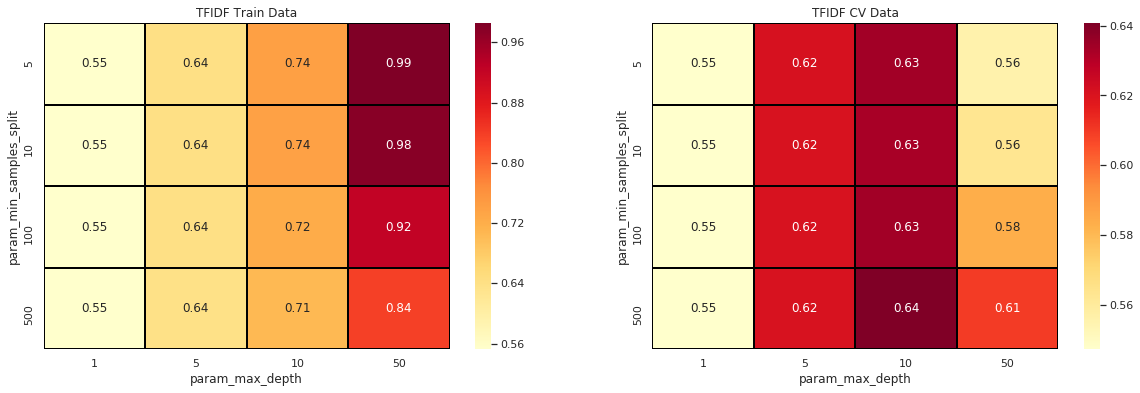

In [0]:
sns.set()
Dec_Tree_CV = pd.DataFrame(Dec_Tree_C.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(Dec_Tree_CV.mean_train_score, annot = True,cbar=True, fmt='.2g', cmap='YlOrRd', linewidths=1,linecolor='black', ax=ax[0])
sns.heatmap(Dec_Tree_CV.mean_test_score, annot = True, fmt='.2g', cmap='YlOrRd', linewidths=1,linecolor='black', ax=ax[1])
ax[0].set_title('TFIDF Train Data')
ax[1].set_title('TFIDF CV Data')
plt.show()

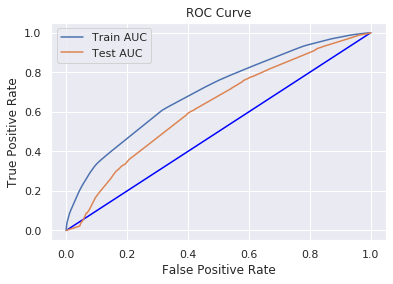

------------------------------------------------------------------------------------------------------------------------
Optimal value of AUC Train = 0.7007161862927224
Optimal value of AUC Test = 0.6218123067835468


In [0]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

TFIDF_MD=(Dec_Tree_C.best_params_['max_depth'])
TFIDF_MSS=(Dec_Tree_C.best_params_['min_samples_split'])
Dec_Tree_C_OP=DecisionTreeClassifier(class_weight = 'balanced',max_depth=TFIDF_MD,min_samples_split=TFIDF_MSS)
Dec_Tree_C_OP.fit(TFIDF_Train, Y_Train)

Y_Train_PR = Dec_Tree_C_OP.predict_proba(TFIDF_Train) [:,1]
Y_Test_PR = Dec_Tree_C_OP.predict_proba(TFIDF_Test) [:,1]

fpr_Train, tpr_Train, thresholds_Train = roc_curve(Y_Train, Y_Train_PR)
fpr_Test, tpr_Test, thresholds_Test = roc_curve(Y_Test, Y_Test_PR)

TFIDF_AUC = auc(fpr_Test, tpr_Test)
plt.plot([0,1],[0,1],'k-',color='blue')
plt.plot(fpr_Train, tpr_Train, label="Train AUC")
plt.plot(fpr_Test, tpr_Test, label="Test AUC")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("-"*120)
print("Optimal value of AUC Train =",auc(fpr_Train, tpr_Train))
print("Optimal value of AUC Test =",auc(fpr_Test, tpr_Test))
pred1 = Dec_Tree_C_OP.predict(TFIDF_Train)
pred2 = Dec_Tree_C_OP.predict(TFIDF_Test)

###Confusion Matrix

Text(0.5, 1, 'Project is APPROVED or NOT Confusion Matrix - Train Data')

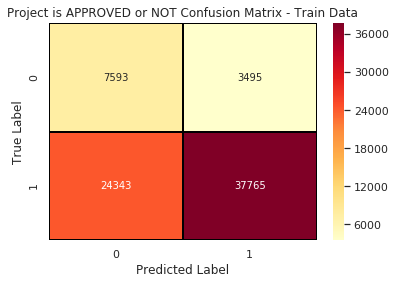

In [0]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
%matplotlib inline
Train = confusion_matrix(Y_Train, pred1)
sns.heatmap(Train,annot=True,cbar=True,fmt='d', cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 7593; False Negative = 24343; True Positive = 37765; False Positive = 3495<br>
Accuracy (Overall, how often is the classifier correct) = 0.62<br>
Precision(When it predicts yes, how often is it correct) =0.92<br>
Misclassification (Overall, how often is it wrong) =0.39</font>


Text(0.5, 1, 'Project is APPROVED or NOT Confusion Matrix - Test Data')

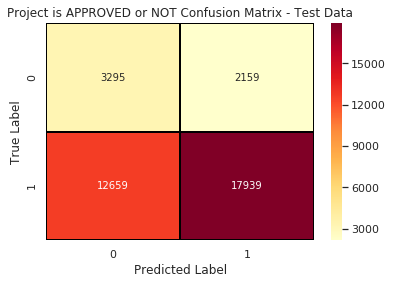

In [0]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
Test = confusion_matrix(Y_Test, pred2)
sns.heatmap(Test,annot=True,cbar=True,fmt='d', cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 3295; False Negative = 12659; True Positive = 17939; False Positive = 2159<br>
Accuracy (Overall, how often is the classifier correct) = 0.59<br>
Precision(When it predicts yes, how often is it correct) =0.90<br>
Misclassification (Overall, how often is it wrong) =0.42</font>


###WordCloud

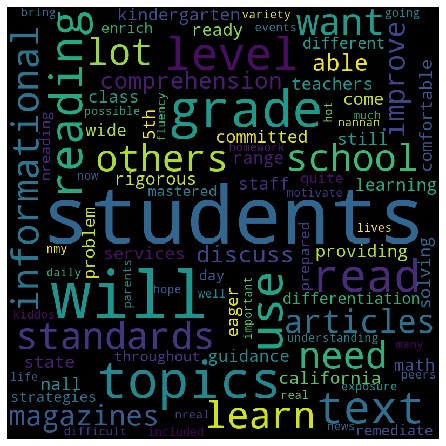

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
fpi = []
for i in range(len(Y_Test)) :
  if (Y_Test[i] == 0) & (pred2[i] == 1) :
    fpi.append(i)

X_Test_ES = pd.DataFrame(X_Test['essay'])

fp_essay1 = []
for i in fpi :
  #pdb.set_trace()
  fp_essay1.append(X_Test_ES['essay'][i])
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

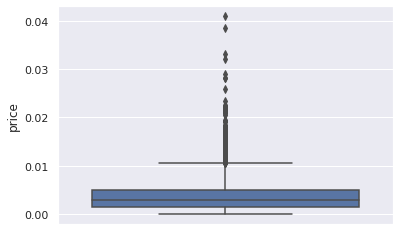

In [0]:
cols = X_Test.columns
X_Test_fp = pd.DataFrame(columns=cols)
for i in fpi :
  X_Test_fp = X_Test_fp.append(X_Test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_Test_fp)

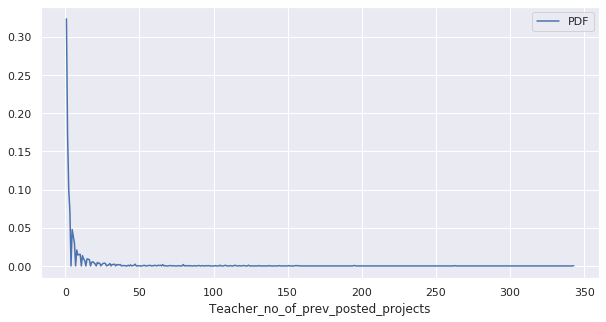

In [0]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(10,5))
counts, bin_edges = np.histogram(X_Test_fp['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"])
plt.xlabel('Teacher_no_of_prev_posted_projects')
plt.show()

In [0]:
#Feature aggregation
feat_1=vectorizer_cat.get_feature_names()
feat_2=vectorizer_sub_cat.get_feature_names()
feat_3=vectorizer_school.get_feature_names()
feat_4=vectorizer_prefix.get_feature_names()
feat_5=vectorizer_grade.get_feature_names()
feat_ES=vectorizer_essays_tfidf.get_feature_names()
feat_TT=vectorizer_titles_tfidf.get_feature_names()

feat_net_tfidf = feat_1 + feat_2 + feat_3 + feat_4 + feat_5 + feat_ES + feat_TT
# p is price, q is quantity, t is teacher previous year projects
feat_net_tfidf.append('price')
feat_net_tfidf.append('quantity')
feat_net_tfidf.append('prev_proposed_projects')
feat_net_tfidf.append("title_word_count")
feat_net_tfidf.append("essay_word_count")
feat_net_tfidf.append('sentiment_Test_P')
feat_net_tfidf.append('sentiment_Test_N')
feat_net_tfidf.append('sentiment_Test_NE')
feat_net_tfidf.append('sentiment_Test_C')

print(len(feat_net_tfidf))

16884


In [0]:
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
Dec_Tree_C_OP=DecisionTreeClassifier(class_weight = 'balanced',max_depth=TFIDF_MD,min_samples_split=TFIDF_MSS)
Dec_Tree_C_OP.fit(TFIDF_Train, Y_Train)
dot_data = tree.export_graphviz(Dec_Tree_C_OP, out_file=None, feature_names=feat_net_tfidf)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Tfidf decision tree",view = True)
dot_data = StringIO()
export_graphviz(Dec_Tree_C_OP, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feat_net_tfidf,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Applying Decision Tree on TFIDF_W2V,<font color='red'> SET 2</font>

In [0]:
%%time
Dec_Tree = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
Dec_Tree_C = RandomizedSearchCV(Dec_Tree, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_iter=30)
Dec_Tree_C.fit(TFIDF_W2V_Train, Y_Train)
print(Dec_Tree_C.best_estimator_)
#print(Dec_Tree_C.cv_results_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
CPU times: user 25min 46s, sys: 409 ms, total: 25min 46s
Wall time: 25min 46s


###TFIDF W2V Heatmap

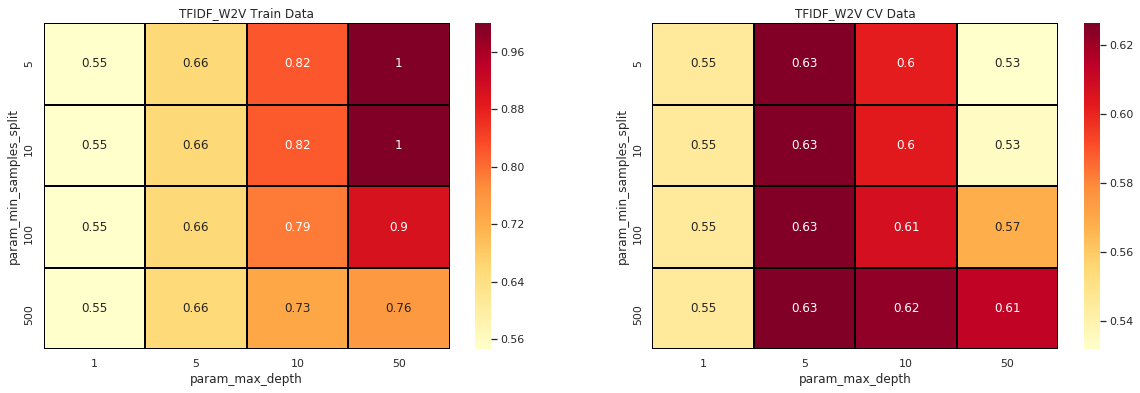

In [0]:
sns.set()
Dec_Tree_CV = pd.DataFrame(Dec_Tree_C.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(Dec_Tree_CV.mean_train_score, annot = True,cbar=True, fmt='.2g', cmap='YlOrRd', linewidths=1,linecolor='black', ax=ax[0])
sns.heatmap(Dec_Tree_CV.mean_test_score, annot = True, fmt='.2g', cmap='YlOrRd', linewidths=1,linecolor='black', ax=ax[1])
ax[0].set_title('TFIDF_W2V Train Data')
ax[1].set_title('TFIDF_W2V CV Data')
plt.show()

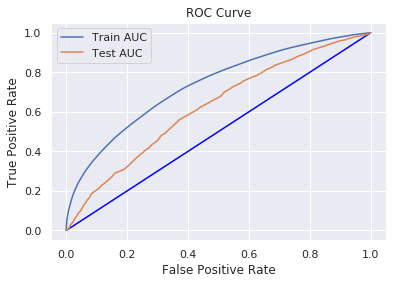

------------------------------------------------------------------------------------------------------------------------
Optimal value of AUC Train = 0.7335238586109045
Optimal value of AUC Test = 0.6240460475988554


In [0]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

TFIDF_W2V_MD=(Dec_Tree_C.best_params_['max_depth'])
TFIDF_W2V_MSS=(Dec_Tree_C.best_params_['min_samples_split'])
Dec_Tree_C_OP=DecisionTreeClassifier(class_weight = 'balanced',max_depth=TFIDF_MD,min_samples_split=TFIDF_MSS)
Dec_Tree_C_OP.fit(TFIDF_W2V_Train, Y_Train)

Y_Train_PR = Dec_Tree_C_OP.predict_proba(TFIDF_W2V_Train) [:,1]
Y_Test_PR = Dec_Tree_C_OP.predict_proba(TFIDF_W2V_Test) [:,1]

fpr_Train, tpr_Train, thresholds_Train = roc_curve(Y_Train, Y_Train_PR)
fpr_Test, tpr_Test, thresholds_Test = roc_curve(Y_Test, Y_Test_PR)

TFIDF_W2V_AUC = auc(fpr_Test, tpr_Test)
plt.plot([0,1],[0,1],'k-',color='blue')
plt.plot(fpr_Train, tpr_Train, label="Train AUC")
plt.plot(fpr_Test, tpr_Test, label="Test AUC")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("-"*120)
print("Optimal value of AUC Train =",auc(fpr_Train, tpr_Train))
print("Optimal value of AUC Test =",auc(fpr_Test, tpr_Test))
pred3 = Dec_Tree_C_OP.predict(TFIDF_W2V_Train)
pred4 = Dec_Tree_C_OP.predict(TFIDF_W2V_Test)

###Confusion Matrix

Text(0.5, 1, 'Project is APPROVED or NOT Confusion Matrix - Train Data')

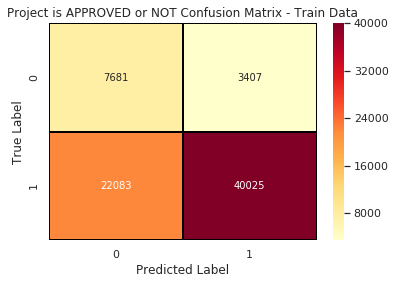

In [0]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
%matplotlib inline
Train = confusion_matrix(Y_Train, pred3)
sns.heatmap(Train,annot=True,cbar=True,fmt='d', cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 7681; False Negative = 22083; True Positive = 40025; False Positive = 3407<br>
Accuracy (Overall, how often is the classifier correct) = 0.66<br>
Precision(When it predicts yes, how often is it correct) =0.93<br>
Misclassification (Overall, how often is it wrong) =0.35</font>


Text(0.5, 1, 'Project is APPROVED or NOT Confusion Matrix - Test Data')

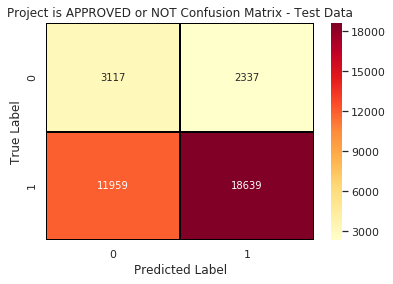

In [0]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
Test = confusion_matrix(Y_Test, pred4)
sns.heatmap(Test,annot=True,cbar=True,fmt='d', cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 3117; False Negative = 11959; True Positive = 18639; False Positive = 2337<br>
Accuracy (Overall, how often is the classifier correct) = 0.61<br>
Precision(When it predicts yes, how often is it correct) =0.89<br>
Misclassification (Overall, how often is it wrong) =0.40</font>

###WordCloud

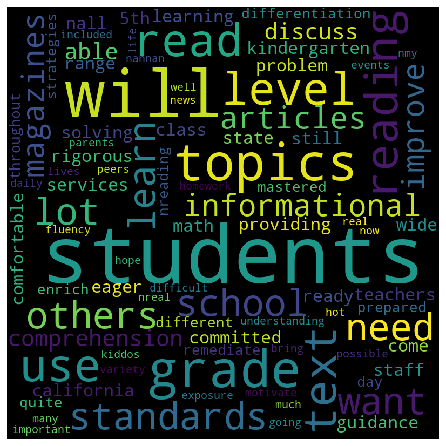

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
fpi = []
for i in range(len(Y_Test)) :
  if (Y_Test[i] == 0) & (pred2[i] == 1) :
    fpi.append(i)

X_Test_ES = pd.DataFrame(X_Test['essay'])

fp_essay1 = []
for i in fpi :
  #pdb.set_trace()
  fp_essay1.append(X_Test_ES['essay'][i])
# Word cloud of essay
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords,
min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

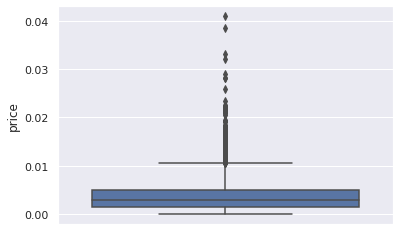

In [0]:
cols = X_Test.columns
X_Test_fp = pd.DataFrame(columns=cols)
for i in fpi :
  X_Test_fp = X_Test_fp.append(X_Test.filter(items=[i], axis=0))
sns.boxplot(y='price', data=X_Test_fp)

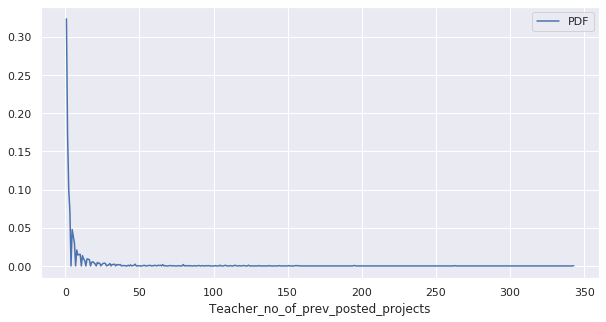

In [0]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(10,5))
counts, bin_edges = np.histogram(X_Test_fp['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
pdfP, = plt.plot(bin_edges[1:], pdf)
plt.legend([pdfP], ["PDF"])
plt.xlabel('Teacher_no_of_prev_posted_projects')
plt.show()

###[Task-2]Applying Decision Tree on <font color='red'> Non-zero features importance of Set-1</font>

In [0]:
#https://www.geeksforgeeks.org/numpy-nonzero-in-python/
# Coverting the Non-zero important features into a new dataset

Dec_Tree_C1=DecisionTreeClassifier(class_weight = 'balanced',max_depth=None,min_samples_split=TFIDF_MSS)
Dec_Tree_C1.fit(TFIDF_Train, Y_Train)
Fe_Im=Dec_Tree_C1.feature_importances_ 
NZFI = np.nonzero(Fe_Im)
df = pd.DataFrame(TFIDF_Train.toarray())

ls=[]
NZFI_TR= pd.DataFrame()
NZFI1_TR=list(NZFI)
for i in NZFI1_TR:
    ls.append(i) 
for j in ls:
  for k in j:
      m=int(k)
      fn=feat_net_tfidf[m]
      t_ls=list(df[m])
      NZFI_TR[fn] = t_ls

df_ts = pd.DataFrame(TFIDF_Test.toarray())
ls_ts=[]
NZFI_TS= pd.DataFrame()

NZFI1_TS=list(NZFI1_TR)
for i in NZFI1_TS:
    ls_ts.append(i)
for j in ls_ts:
  for k in j:
      m=int(k)
      fn=feat_net_tfidf[m]
      t_ls_ts=list(df_ts[m])
      NZFI_TS[fn] = t_ls_ts
print("-"*120)
print("Shape of the Non Zero features important Train Dataset:",NZFI_TR.shape)
print("Shape of the Non Zero features important Test Dataset:",NZFI_TS.shape)


------------------------------------------------------------------------------------------------------------------------
Shape of the Non Zero features important Train Dataset: (73196, 1077)
Shape of the Non Zero features important Test Dataset: (36052, 1077)


In [0]:
# Non-zero important features of Set-1    
for j in ls:
  for k in j:
      m=int(k)
      fn=feat_net_tfidf[m]
      print(fn)

Literacy_Language
PerformingArts
wv
ar
mn
ga
ny
mr
grades_6_8
100
11th
12
14
15
17
20
2006
2016
2nd
35
3d
3rd
4th
54
70
700
80
83
abilities
able
abstract
academics
acceptance
accomplish
account
accuracy
accurate
acquire
across
active
actively
activities
activity
actual
adapted
adapters
add
added
adding
additional
admired
adulthood
adults
affluent
age
agency
aid
air
alaska
alive
allow
allowed
allowing
alphabet
already
also
always
amazed
amazing
analysis
another
answering
appeal
appear
apple
appreciated
approaches
apps
argue
arts
asking
assess
assigned
assignments
atoms
attend
attitude
attracts
available
babysit
background
backpacks
bad
bags
balance
ball
balls
band
bands
based
basic
basketball
bathroom
batteries
beach
bean
beating
beautiful
became
become
becoming
beethoven
beg
behavior
behavioral
behind
belong
best
better
beyond
big
binders
bins
biology
black
blessed
blessing
blocks
bloomington
board
boards
boats
boiling
book
books
boring
borrow
bottles
bought
bouncy
box
boy
braille
brav

In [0]:
%%time
Dec_Tree = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
Dec_Tree_C = RandomizedSearchCV(Dec_Tree, parameters, cv=3, scoring='roc_auc',return_train_score=True,n_iter=30)
Dec_Tree_C.fit(NZFI_TR, Y_Train)
print(Dec_Tree_C.best_estimator_)
#print(Dec_Tree_C.cv_results_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
CPU times: user 6min 9s, sys: 71.7 ms, total: 6min 9s
Wall time: 6min 9s


###Non-zero features importance Heatmap

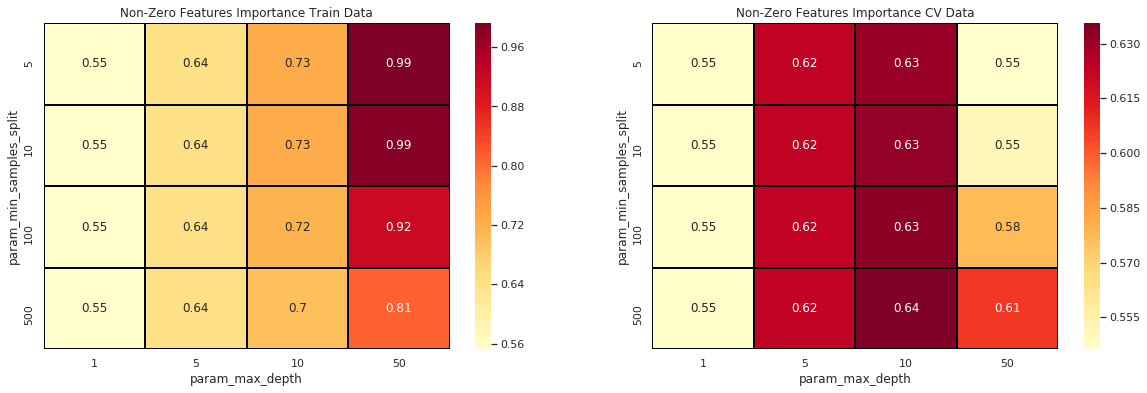

In [0]:
sns.set()
Dec_Tree_CV = pd.DataFrame(Dec_Tree_C.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(Dec_Tree_CV.mean_train_score, annot = True,cbar=True, fmt='.2g', cmap='YlOrRd', linewidths=1,linecolor='black', ax=ax[0])
sns.heatmap(Dec_Tree_CV.mean_test_score, annot = True, fmt='.2g', cmap='YlOrRd', linewidths=1,linecolor='black', ax=ax[1])
ax[0].set_title('Non-Zero Features Importance Train Data')
ax[1].set_title('Non-Zero Features Importance CV Data')
plt.show()

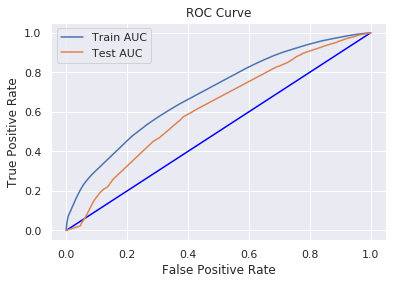

------------------------------------------------------------------------------------------------------------------------
Optimal value of AUC Train = 0.6938484698394856
Optimal value of AUC Test = 0.6155285512428185


In [0]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

NZIF_MD=(Dec_Tree_C.best_params_['max_depth'])
NZIF_MSS=(Dec_Tree_C.best_params_['min_samples_split'])
Dec_Tree_C_OP=DecisionTreeClassifier(class_weight = 'balanced',max_depth=TFIDF_MD,min_samples_split=TFIDF_MSS)
# for visulation
Dec_Tree_C_OP.fit(NZFI_TR, Y_Train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
Y_Train_PR = Dec_Tree_C_OP.predict_proba(NZFI_TR) [:,1]
Y_Test_PR = Dec_Tree_C_OP.predict_proba(NZFI_TS) [:,1]

fpr_Train, tpr_Train, thresholds_Train = roc_curve(Y_Train, Y_Train_PR)
fpr_Test, tpr_Test, thresholds_Test = roc_curve(Y_Test, Y_Test_PR)

NZIF_AUC = auc(fpr_Test, tpr_Test)
plt.plot([0,1],[0,1],'k-',color='blue')
plt.plot(fpr_Train, tpr_Train, label="Train AUC")
plt.plot(fpr_Test, tpr_Test, label="Test AUC")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("-"*120)
print("Optimal value of AUC Train =",auc(fpr_Train, tpr_Train))
print("Optimal value of AUC Test =",auc(fpr_Test, tpr_Test))
pred5 = Dec_Tree_C_OP.predict(NZFI_TR)
pred6 = Dec_Tree_C_OP.predict(NZFI_TS)

###Confusion Matrix

Text(0.5, 1, 'Project is APPROVED or NOT Confusion Matrix - Train Data')

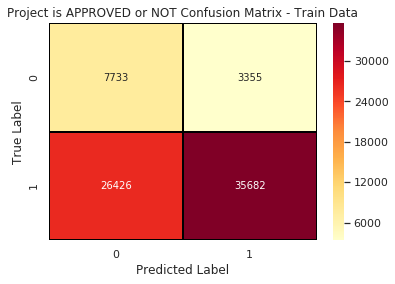

In [0]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
%matplotlib inline
Train = confusion_matrix(Y_Train, pred5)
sns.heatmap(Train,annot=True,cbar=True,fmt='d', cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Train Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 7733; False Negative = 26426; True Positive = 35682; False Positive = 3355<br>
Accuracy (Overall, how often is the classifier correct) = 0.60<br>
Precision(When it predicts yes, how often is it correct) =0.92<br>
Misclassification (Overall, how often is it wrong) =0.41</font>


Text(0.5, 1, 'Project is APPROVED or NOT Confusion Matrix - Test Data')

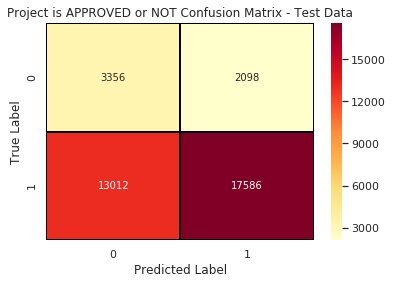

In [0]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
Test = confusion_matrix(Y_Test, pred6)
sns.heatmap(Test,annot=True,cbar=True,fmt='d', cmap='YlOrRd',linewidths=1,linecolor='black')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Project is APPROVED or NOT Confusion Matrix - Test Data')

<font color='blue'>**OBSERVATION:**<br>
True Negative = 3356; False Negative = 13012; True Positive = 17586; False Positive = 2098<br>
Accuracy (Overall, how often is the classifier correct) = 0.59<br>
Precision(When it predicts yes, how often is it correct) =0.90<br>
Misclassification (Overall, how often is it wrong) =0.42</font>

In [0]:
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
Dec_Tree_C_OP=DecisionTreeClassifier(class_weight = 'balanced',max_depth=TFIDF_MD,min_samples_split=TFIDF_MSS)
Dec_Tree_C_OP.fit(NZFI_TR, Y_Train)
graph.format = 'png'
dot_data = StringIO()
export_graphviz(Dec_Tree_C_OP, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=NZFI_TR.columns,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

<h1>3. Conclusions</h1>

In [0]:
# Please compare all your models using Prettytable library

pt = PrettyTable()
pt.field_names= ("S.No","Vectorizer", "Model", "Max Depth","Min Samples Split", "AUC")
pt.add_row(["1","TFIDF", "DecisionTree",TFIDF_MD, TFIDF_MSS, TFIDF_AUC])
pt.add_row(["2","TFIDF_W2V", "DecisionTree", TFIDF_W2V_MD,TFIDF_W2V_MSS,TFIDF_W2V_AUC])
pt.add_row(["3","[Task-2]-Non Zero Features Importance", "DecisionTree",NZIF_MD,NZIF_MSS, NZIF_AUC])
print(pt)

+------+---------------------------------------+--------------+-----------+-------------------+--------------------+
| S.No |               Vectorizer              |    Model     | Max Depth | Min Samples Split |        AUC         |
+------+---------------------------------------+--------------+-----------+-------------------+--------------------+
|  1   |                 TFIDF                 | DecisionTree |     10    |        500        | 0.6218123067835468 |
|  2   |               TFIDF_W2V               | DecisionTree |     5     |        500        | 0.6240460475988554 |
|  3   | [Task-2]-Non Zero Features Importance | DecisionTree |     10    |        500        | 0.6155285512428185 |
+------+---------------------------------------+--------------+-----------+-------------------+--------------------+


<font color='darkblue'>**SUMMARY:**</font><br>
<font color='blue'>
    1. Compare to KNN and SVM <font color='green'>**"DecisionTree"**</font> had less space and time complexity.<br>
    2. Overall test accuracy score is average.<br>
    3. There is no much difference in the AUC score for Non Zero important fetaures and TFIDF. Both are look similar only.<br>
    4. <font color='green'>**"TFIDF W2V"** performing very well</font> in accuracy and misclassification scores.When compare to other vectorizer's.<br>
    </font>